<a href="https://colab.research.google.com/github/AKlebedeff/AKlebedeff2/blob/main/3_L2_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

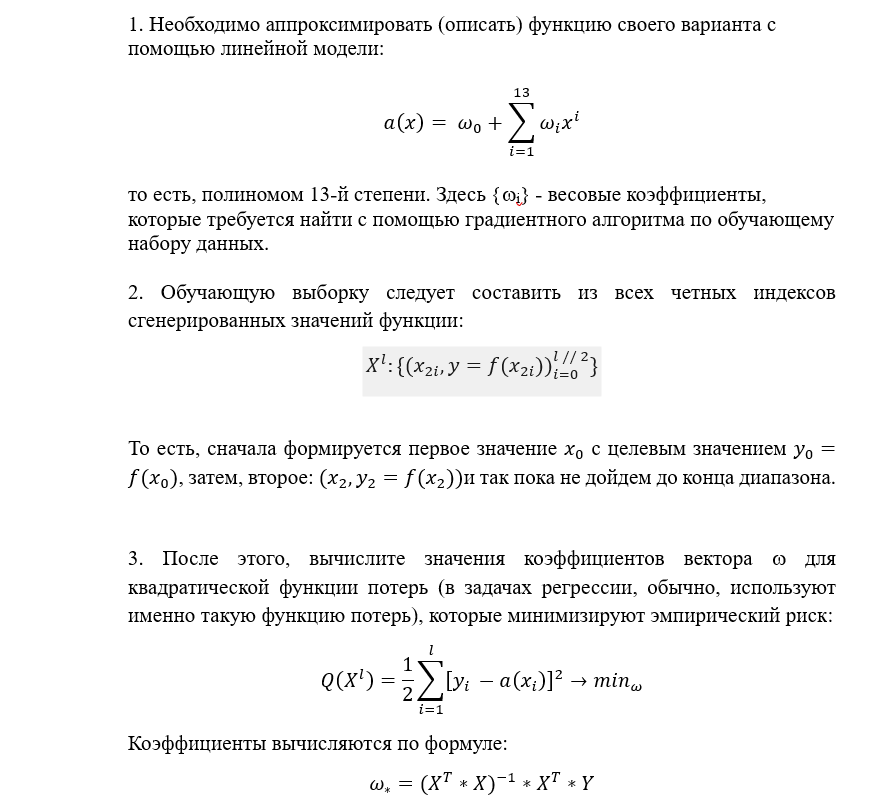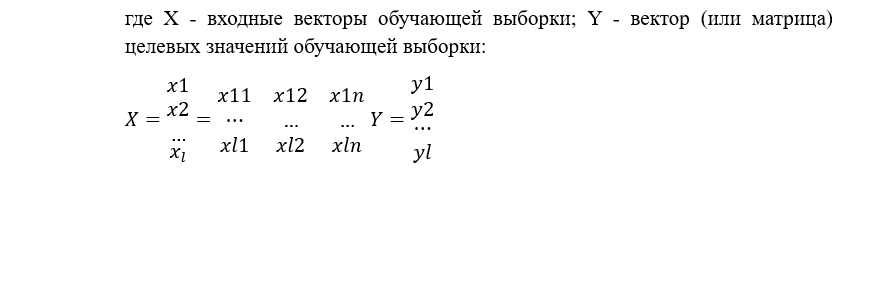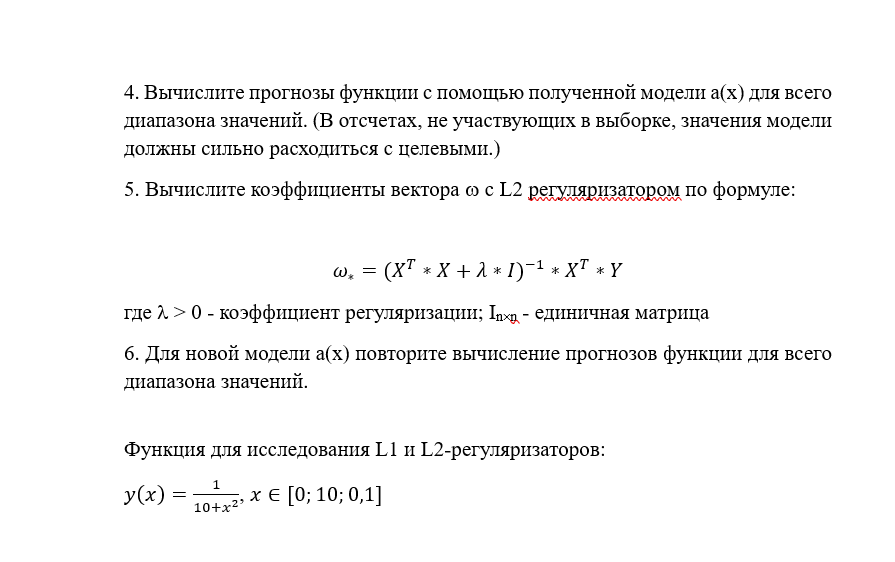

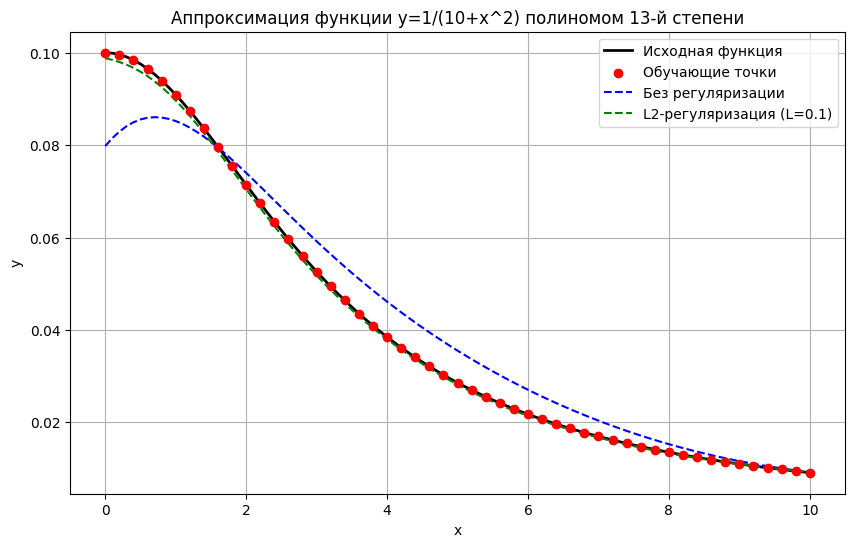

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Исходная функция
def f(x):
    return 1 / (10 + x**2)

#  Диапазон значений
x = np.arange(0, 10.1, 0.1)
y = f(x)

# 2. Формируем обучающую выборку — только чётные индексы
x_train = x[::2]
y_train = y[::2]

#  Размер признакового пространства (полином 13-й степени)
N = 13
# 3. Матрица входных векторов для всего диапазона
X = np.array([[a**n for n in range(N)] for a in x])
#  Обучающая матрица признаков
X_train = np.array([[a**n for n in range(N)] for a in x_train])
Y = y_train

# 4. Вычисление коэффициентов без регуляризации
w_no_reg = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y

# 5. Прогноз модели без регуляризации
y_pred_no_reg = X @ w_no_reg

# 6. Коэффициент регуляризации
L = 0.1
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])
IL[0][0] = 0  # не регуляризуем свободный член
# Вычисление коэффициентов с L2-регуляризацией
w_l2 = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ Y

# 7. Прогноз модели новый
y_pred_l2 = X @ w_l2

# 8. Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Исходная функция', color='black', linewidth=2)
plt.scatter(x_train, y_train, color='red', label='Обучающие точки', zorder=5)
plt.plot(x, y_pred_no_reg, '--', color='blue', label='Без регуляризации')
plt.plot(x, y_pred_l2, '--', color='green', label=f'L2-регуляризация (L={L})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Аппроксимация функции y=1/(10+x^2) полиномом 13-й степени')
plt.show()
